# Ejercicio Individual MD008

In [120]:
#librerias

import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.preprocessing import StandardScaler # Escalamiento de los datos
from sklearn.decomposition import PCA # Para hacer un PCA
from sklearn.pipeline import make_pipeline # Para hacer pipelines
from sklearn import metrics # Calcula métricas para un modelo
from sklearn.tree import DecisionTreeRegressor # Generación de modelos de decision tree
from sklearn.ensemble import BaggingRegressor # Generación de modelos de bagging
from sklearn.ensemble import RandomForestRegressor # Generación de modelo de random forest
from sklearn.model_selection import train_test_split # Hace split entre training y testing
from sklearn.model_selection import cross_validate # trains model with cross validation
from sklearn.model_selection import GridSearchCV # Optimización de hiperparámetros para un modelo
from sklearn.preprocessing import OneHotEncoder # One Hot encoding de las variables categóricas

import warnings
warnings.filterwarnings('ignore') #ignora los errores en el notebook

Una vez he importado las librerias me dispongo a leer los datos y realizar las transfromaciones indicadas en el enunciado.

In [230]:
#lectura datos
data = pd.read_csv('./0_processed_renting_Barcelona.csv', delimiter = ',')
data['precio_de_alquiler_por_metro_cuadrado'] = data['price'] / data['sq_meters_built']
data['rooms'] = data['rooms'] / data['sq_meters_built']
data['bathrooms'] = data['bathrooms'] / data['sq_meters_built']

data.head()

id  price currency   latitude  longitude  sq_meters  sq_meters_built  \
0  536625    850    €/mes  41.401708   2.154077       52.0               55   
1  545910    725    €/mes  41.407221   2.135569       32.0               37   
2  570697    950    €/mes  41.411508   2.164608        NaN               72   
3  591588    750    €/mes  41.402256   2.140764        NaN               45   
4  610243    990    €/mes  41.405327   2.146929        NaN               45   

      rooms  bathrooms  balcony  ...  dist_city_center  furniture garage  \
0  0.036364   0.018182      NaN  ...          2.026455        3.0    NaN   
1  0.054054   0.027027      1.0  ...          3.582409        NaN    NaN   
2  0.041667   0.013889      NaN  ...          2.663025        3.0    NaN   
3  0.022222   0.022222      1.0  ...          2.910067        3.0    NaN   
4  0.022222   0.022222      NaN  ...          2.727149        3.0    NaN   

   property_type  garden  closest_station  dist_closest_station  \
0           piso     NaN          Fontana              0.094111   
1           piso     NaN        Vallcarca              0.902561   
2           piso     NaN         Alfons X              0.188177   
3           piso     NaN          Lesseps              0.892917   
4           piso     NaN          Lesseps              0.293784   

        created_at        last_seen precio_de_alquiler_por_metro_cuadrado  
0   9/1/2021 15:58   10/4/2021 6:01                             15.454545  
1   9/2/2021 15:24   9/8/2021 12:29                             19.594595  
2  8/28/2021 23:52  8/28/2021 23:52                             13.194444  
3  8/29/2021 11:25   9/8/2021 12:29                             16.666667  
4  8/30/2021 13:48  8/30/2021 14:04                             22.000000  

[5 rows x 34 columns]

## Análisis exploratorio y limpieza de instancias

In [122]:
data.describe()

id         price     latitude    longitude    sq_meters  \
count  8.502000e+03   8502.000000  8502.000000  8502.000000  4967.000000   
mean   8.852101e+07   1117.482828    41.398106     2.162651    65.191464   
std    1.781127e+07   1010.198242     0.018344     0.020805    40.805539   
min    5.366250e+05    365.000000    41.353583     2.102393     3.000000   
25%    9.235744e+07    768.250000    41.382177     2.146160    45.000000   
50%    9.505698e+07    850.000000    41.397202     2.164480    58.000000   
75%    9.519903e+07   1100.000000    41.409961     2.178082    71.000000   
max    9.589512e+07  27500.000000    41.467905     2.218582   672.000000   

       sq_meters_built        rooms    bathrooms  balcony  terrace  ...  \
count      8502.000000  8502.000000  8502.000000   3485.0   1928.0  ...   
mean         72.478711     0.029608     0.019309      1.0      1.0  ...   
std          49.650215     0.013753     0.006741      0.0      0.0  ...   
min          11.000000     0.000000     0.001085      1.0      1.0  ...   
25%          50.000000     0.021277     0.014706      1.0      1.0  ...   
50%          63.000000     0.030303     0.018018      1.0      1.0  ...   
75%          79.000000     0.040000     0.022222      1.0      1.0  ...   
max         981.000000     0.083333     0.090909      1.0      1.0  ...   

        pool      ac   year_built  quality  dist_city_center  furniture  \
count  321.0  4086.0  4006.000000   8502.0       8502.000000     7250.0   
mean     1.0     1.0  1950.885921      2.0          2.616749        3.0   
std      0.0     0.0    38.391917      0.0          1.409102        0.0   
min      1.0     1.0  1783.000000      2.0          0.062165        3.0   
25%      1.0     1.0  1930.000000      2.0          1.475110        3.0   
50%      1.0     1.0  1962.000000      2.0          2.481490        3.0   
75%      1.0     1.0  1974.000000      2.0          3.589782        3.0   
max      1.0     1.0  2106.000000      2.0          8.940761        3.0   

       garage  garden  dist_closest_station  \
count   385.0    51.0           8502.000000   
mean      1.0     1.0              0.392531   
std       0.0     0.0              0.290708   
min       1.0     1.0              0.007875   
25%       1.0     1.0              0.225168   
50%       1.0     1.0              0.325357   
75%       1.0     1.0              0.453814   
max       1.0     1.0              3.177445   

       precio_de_alquiler_por_metro_cuadrado  
count                            8502.000000  
mean                               15.903669  
std                                 5.535498  
min                                 1.626898  
25%                                12.350735  
50%                                14.545455  
75%                                17.857143  
max                                89.473684  

[8 rows x 25 columns]

In [123]:
print("Proporción de valores nulos (%)")
data.isnull().sum() / len(data) * 100

Proporción de valores nulos (%)


id                                         0.000000
price                                      0.000000
currency                                   0.000000
latitude                                   0.000000
longitude                                  0.000000
sq_meters                                 41.578452
sq_meters_built                            0.000000
rooms                                      0.000000
bathrooms                                  0.000000
balcony                                   59.009645
terrace                                   77.322983
exterior                                   7.833451
orientation                               56.645495
floor                                     23.123971
rooftop                                   92.742884
elevator                                   3.022818
doorman                                  100.000000
pool                                      96.224418
ac                                        51.940720
heating     

Como vemos tenemos una serie de variables conformadas en su mayor parte por valores nulos, ademas, tambien vemos en la celda anterior como nuestra variable objetivo tiene una desviacion realmente considerable por lo que podria dificultarnos la prediccion.

In [124]:
non_numeric_columns = data.select_dtypes(exclude=['number'])

print("Columnas no numéricas:")
print(non_numeric_columns.columns)

Columnas no numéricas:
Index(['currency', 'orientation', 'heating', 'city', 'neighborhood',
       'property_type', 'closest_station', 'created_at', 'last_seen'],
      dtype='object')


A continuacion me dispongo a deshacerme de aquellas variables que no me proporcionan ningun tipo de informacion util para el modelo, como por ejemplo el indice, moneda o fecha del anuncio, y de otras como garden o doorman debido a su inmensa cantidad de valores nulos. Además, también trataré los valores nulos del resto de variables cambiandolos por "unknown" o 0 depenidendo del caso.

In [125]:
data = data.drop(['currency', 'city', 'created_at', 'last_seen', 'id', 'year_built', 'sq_meters', 'sq_meters_built', 'price', 'doorman', 'garden'], axis='columns')


data['orientation'].fillna("Unknown", inplace = True) 
data['heating'].fillna("Unknown", inplace = True) 
data['property_type'].fillna("Unknown", inplace = True) 

features_to_null = ['balcony', 'terrace', 'exterior', 'floor', 'rooftop', 'elevator', 'pool', 'ac', 'garage', 'furniture']
for i in range(0,len(features_to_null)):
   data[features_to_null[i]].fillna(0, inplace = True) 

data.head()

latitude  longitude     rooms  bathrooms  balcony  terrace  exterior  \
0  41.401708   2.154077  0.036364   0.018182      0.0      0.0       1.0   
1  41.407221   2.135569  0.054054   0.027027      1.0      0.0       1.0   
2  41.411508   2.164608  0.041667   0.013889      0.0      0.0       1.0   
3  41.402256   2.140764  0.022222   0.022222      1.0      0.0       1.0   
4  41.405327   2.146929  0.022222   0.022222      0.0      0.0       1.0   

  orientation  floor  rooftop  ...  heating  quality  \
0       norte    2.0      0.0  ...  Unknown        2   
1         sur    3.0      0.0  ...  Unknown        2   
2     Unknown    4.0      0.0  ...  Unknown        2   
3       norte    4.0      0.0  ...  Unknown        2   
4         sur    3.0      0.0  ...      gas        2   

                 neighborhood dist_city_center  furniture garage  \
0                      Gràcia         2.026455        3.0    0.0   
1  Sant Gervasi - La Bonanova         3.582409        0.0    0.0   
2            El Baix Guinardó         2.663025        3.0    0.0   
3  Sant Gervasi - La Bonanova         2.910067        3.0    0.0   
4         Sarrià-Sant Gervasi         2.727149        3.0    0.0   

   property_type  closest_station  dist_closest_station  \
0           piso          Fontana              0.094111   
1           piso        Vallcarca              0.902561   
2           piso         Alfons X              0.188177   
3           piso          Lesseps              0.892917   
4           piso          Lesseps              0.293784   

  precio_de_alquiler_por_metro_cuadrado  
0                             15.454545  
1                             19.594595  
2                             13.194444  
3                             16.666667  
4                             22.000000  

[5 rows x 23 columns]

Lo siguiente que haré en la limpieza de estos datos será tratar la columna de neighborhood, para ello asignare a cada barrio a una de 5 categorias distintas dependiendo de la capacidad economica del barrio, ya que en normas generales, los precios varian mucho dependiendo del barrio en el que te encuentres.

In [126]:
precio_medio_barrio = data.groupby('neighborhood')['precio_de_alquiler_por_metro_cuadrado'].mean().reset_index(name='precio_medio')

percentil_20 = precio_medio_barrio['precio_medio'].quantile(0.20)
percentil_40 = precio_medio_barrio['precio_medio'].quantile(0.40)
percentil_60 = precio_medio_barrio['precio_medio'].quantile(0.60)
percentil_80 = precio_medio_barrio['precio_medio'].quantile(0.80)


def categorizar_precio(precio):
    if precio <= percentil_20:
        return 0
    elif precio <= percentil_40:
        return 1
    elif precio <= percentil_60:
        return 2
    elif precio <= percentil_80:
        return 3
    else:
        return 4
    
precio_medio_barrio['categoria'] = precio_medio_barrio['precio_medio'].apply(categorizar_precio)

# Crear un diccionario para mapear los barrios a sus categorías
diccionario_categorias = precio_medio_barrio.set_index('neighborhood')['categoria'].to_dict()

# Paso 4: Mapear las categorías de vuelta al DataFrame original
data['categoria_barrio'] = data['neighborhood'].map(diccionario_categorias)
data = data.drop(['neighborhood'], axis='columns')
data.head()

latitude  longitude     rooms  bathrooms  balcony  terrace  exterior  \
0  41.401708   2.154077  0.036364   0.018182      0.0      0.0       1.0   
1  41.407221   2.135569  0.054054   0.027027      1.0      0.0       1.0   
2  41.411508   2.164608  0.041667   0.013889      0.0      0.0       1.0   
3  41.402256   2.140764  0.022222   0.022222      1.0      0.0       1.0   
4  41.405327   2.146929  0.022222   0.022222      0.0      0.0       1.0   

  orientation  floor  rooftop  ...  heating  quality  dist_city_center  \
0       norte    2.0      0.0  ...  Unknown        2          2.026455   
1         sur    3.0      0.0  ...  Unknown        2          3.582409   
2     Unknown    4.0      0.0  ...  Unknown        2          2.663025   
3       norte    4.0      0.0  ...  Unknown        2          2.910067   
4         sur    3.0      0.0  ...      gas        2          2.727149   

  furniture  garage  property_type  closest_station  dist_closest_station  \
0       3.0     0.0           piso          Fontana              0.094111   
1       0.0     0.0           piso        Vallcarca              0.902561   
2       3.0     0.0           piso         Alfons X              0.188177   
3       3.0     0.0           piso          Lesseps              0.892917   
4       3.0     0.0           piso          Lesseps              0.293784   

  precio_de_alquiler_por_metro_cuadrado categoria_barrio  
0                             15.454545                3  
1                             19.594595                3  
2                             13.194444                2  
3                             16.666667                3  
4                             22.000000                4  

[5 rows x 23 columns]

In [127]:
print("Proporción de valores nulos (%)")
data.isnull().sum() / len(data) * 100

Proporción de valores nulos (%)


latitude                                 0.0
longitude                                0.0
rooms                                    0.0
bathrooms                                0.0
balcony                                  0.0
terrace                                  0.0
exterior                                 0.0
orientation                              0.0
floor                                    0.0
rooftop                                  0.0
elevator                                 0.0
pool                                     0.0
ac                                       0.0
heating                                  0.0
quality                                  0.0
dist_city_center                         0.0
furniture                                0.0
garage                                   0.0
property_type                            0.0
closest_station                          0.0
dist_closest_station                     0.0
precio_de_alquiler_por_metro_cuadrado    0.0
categoria_

Como observamos ya hemos tratado todos los valores nulos del dataset.

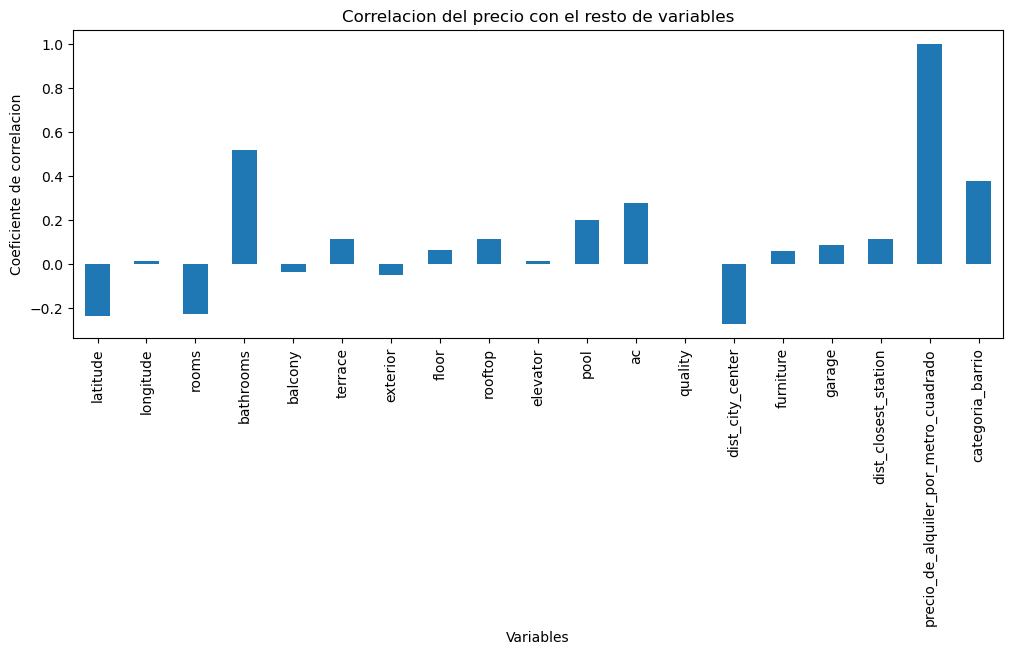

In [128]:
correlation_matrix = data.corr()
target_cor = correlation_matrix.loc['precio_de_alquiler_por_metro_cuadrado']

plt.figure(figsize=(12, 4))
target_cor.plot(kind='bar')
plt.title('Correlacion del precio con el resto de variables')
plt.xlabel('Variables')
plt.ylabel('Coeficiente de correlacion')
plt.show()

Como observamos a traves de las correlaciones con la variable objetivo, las dos variables que mas parecen guardar relacion con la variable objetivo son el barrio y los baños, aunque otras variables como latitude y habitaciones tambien parecen influir, aún asi, la influencia que tienen parece no ser muy significativa.

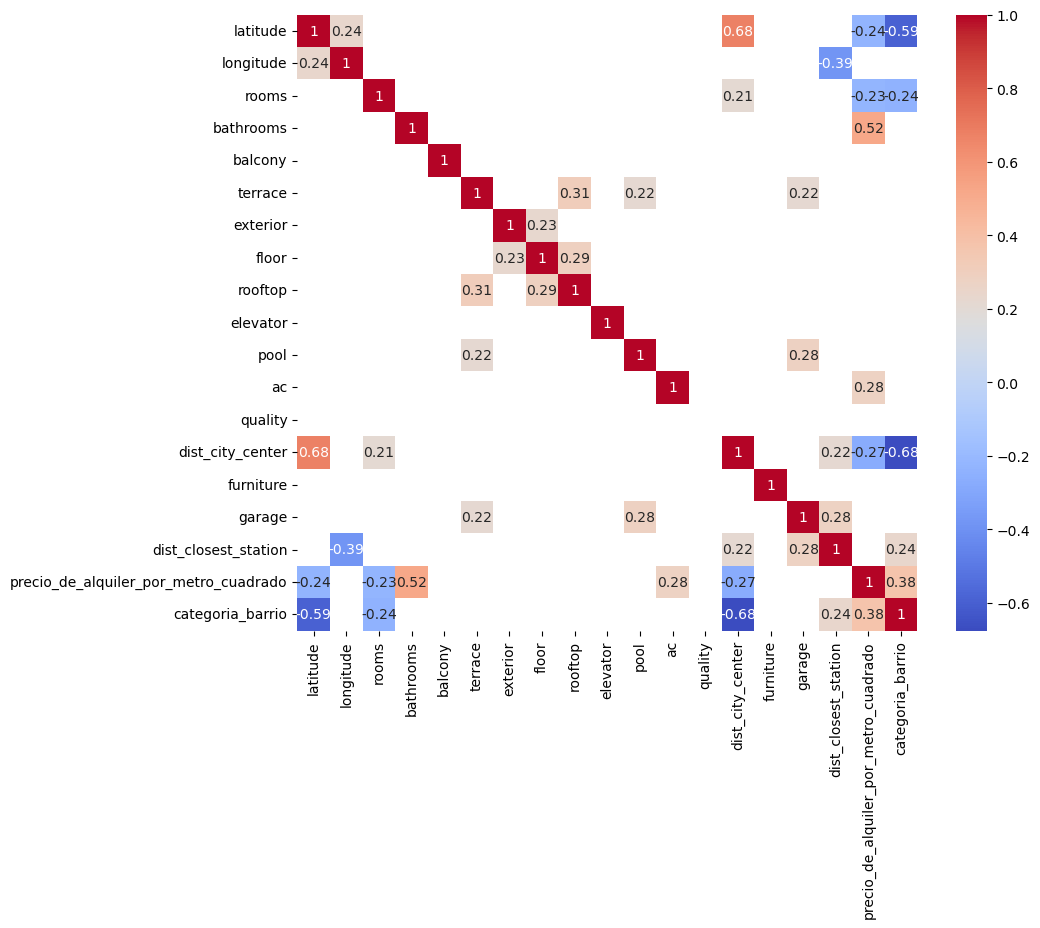

In [129]:
correlation_matrix[np.abs(correlation_matrix) < 0.2] = np.nan

plt.figure(figsize=(10, 8))  # You can adjust the dimensions as needed

# Use Seaborn to create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()


De este analisis de correlaciones, observamos que no parece haber una alta colinealidad entre las variables explicativas, lo que nos gusta. Una cosa que me sorprende, es que las variables de latitud y longitud no parecen tener una fuerte correlacion con el precio. 

Para analizar esto último, me he propuesto realizar un sencillo clustering por precio y despues hacer un plot por latitudes i longitudes para ver si a traves de la localizacion del precio podemos apreciar clusters significativos del precio.

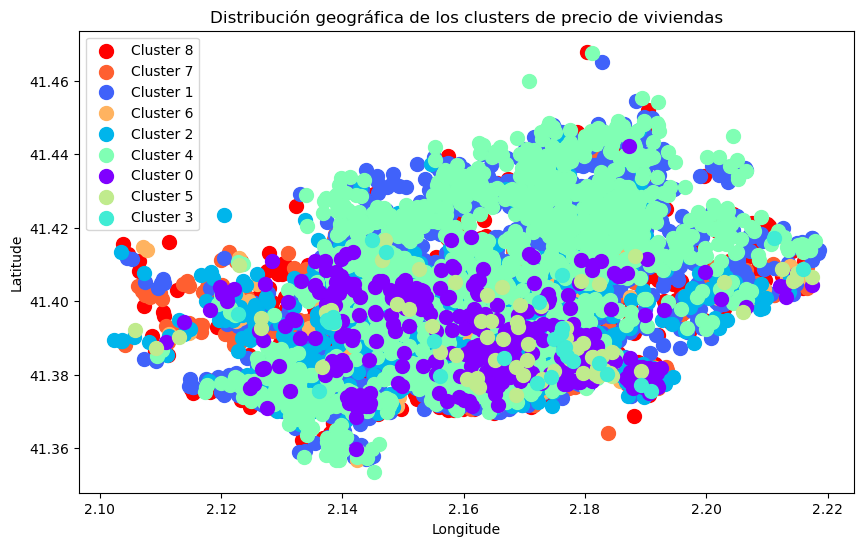

In [130]:
from sklearn.cluster import KMeans
import matplotlib

X = data[['precio_de_alquiler_por_metro_cuadrado']]

# Ejecutando K-Means con solo los precios
kmeans = KMeans(n_clusters=(9), random_state=0).fit(X)

# Añadiendo los labels del cluster al dataframe original
data['cluster'] = kmeans.labels_

colors = plt.cm.rainbow(np.linspace(0, 1, 9))
hex_colors = [matplotlib.colors.rgb2hex(color[:3]) for color in colors]

# Visualizando los resultados
plt.figure(figsize=(10, 6))
for cluster in data['cluster'].unique():
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], color=hex_colors[cluster], label=f'Cluster {cluster}', s=100)
plt.title('Distribución geográfica de los clusters de precio de viviendas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

Vemos como efectivamente la localizacion no parece tener una relevancia notable en el precio, ya que los clusters de precio parecen completamente aleatorios en cuanto a sus latitudes y longitudes.

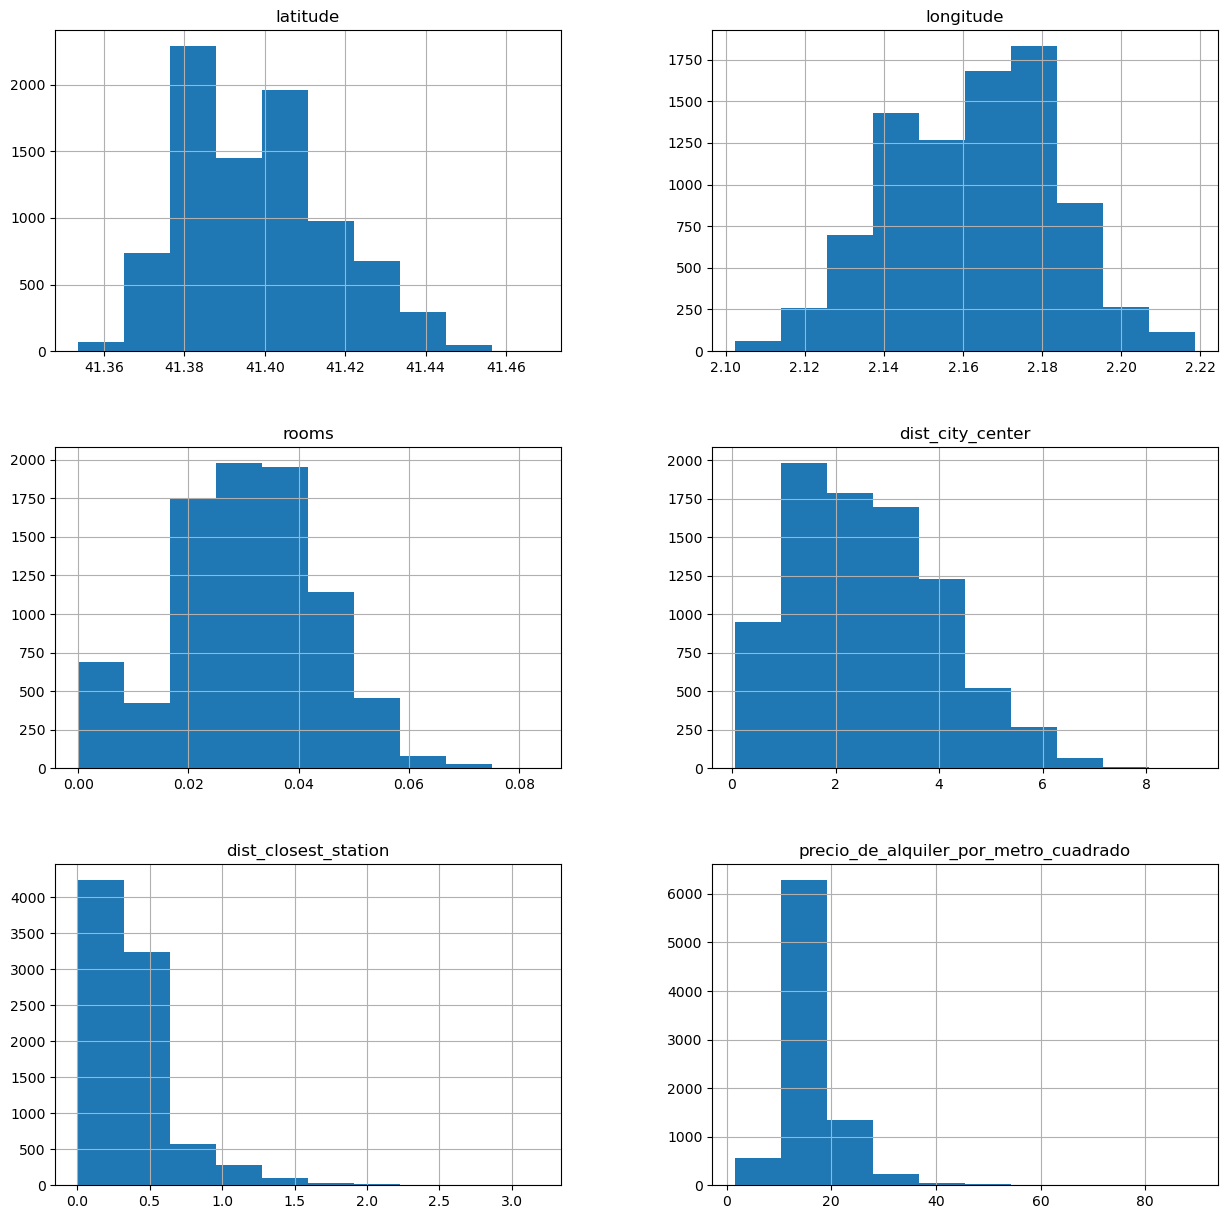

In [233]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
data_cont = data[['latitude', 'longitude', 'rooms','dist_city_center', 'dist_closest_station', 'precio_de_alquiler_por_metro_cuadrado']]
data_cont.hist(ax = ax)
plt.show()

En estos histogramas observamos como la latitud y la longitud parecen seguir algo parecido a una normal y que las variables de distancias se acumulan principalmente en los valores bajos, por lo que ciertos valores extremadamente altos en comparacion podrian llegar a ser considerados outliers.

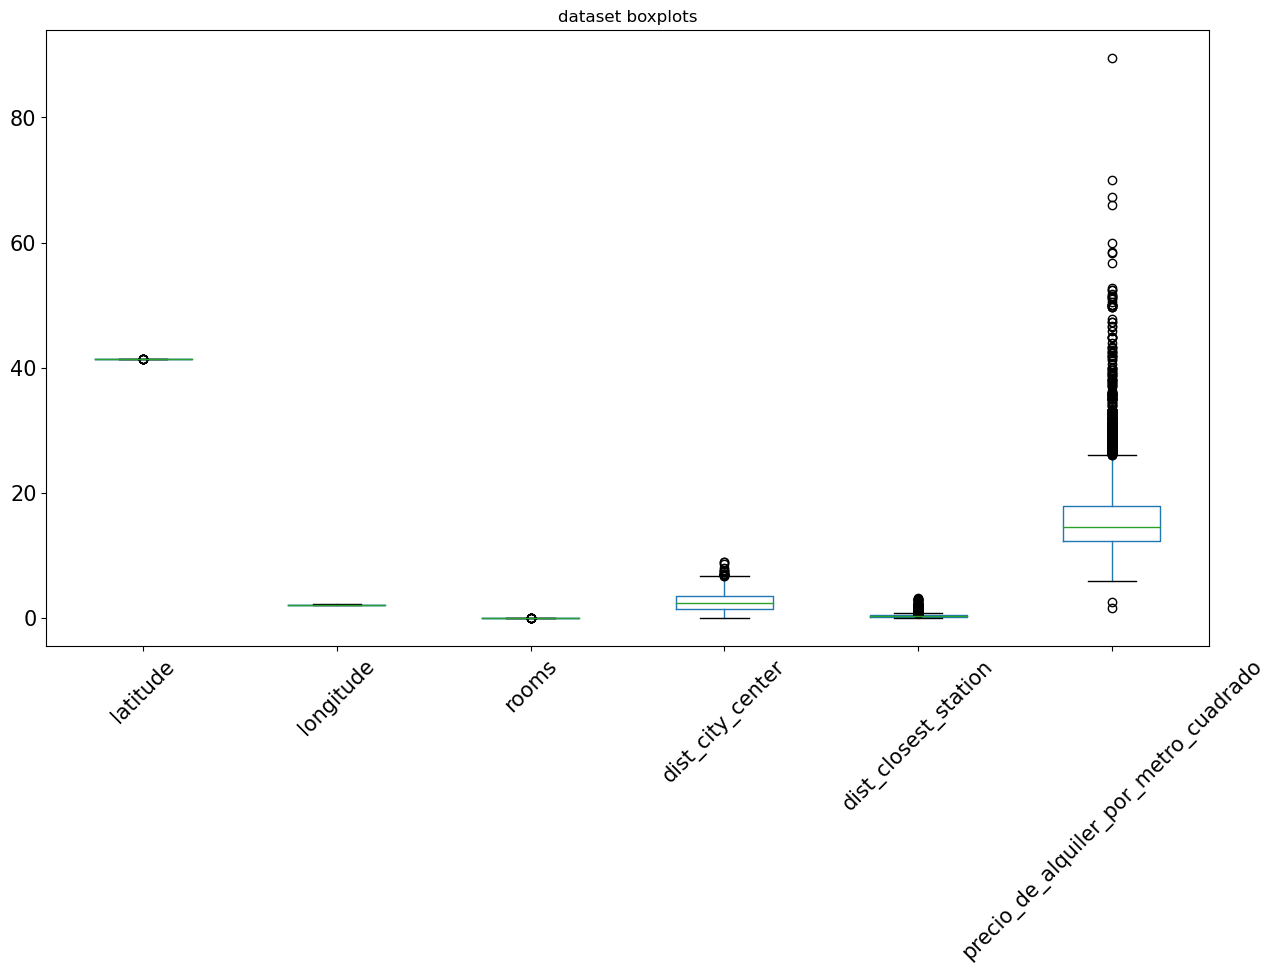

In [234]:
plt.figure(figsize = (15, 8))
plt.title("dataset boxplots")
data_cont.boxplot(grid=False, rot=45, fontsize=15)
plt.show()

Bueno, aqui no vemos mucho, pero observamos como efectivamente las distancias parecen tener outliers.

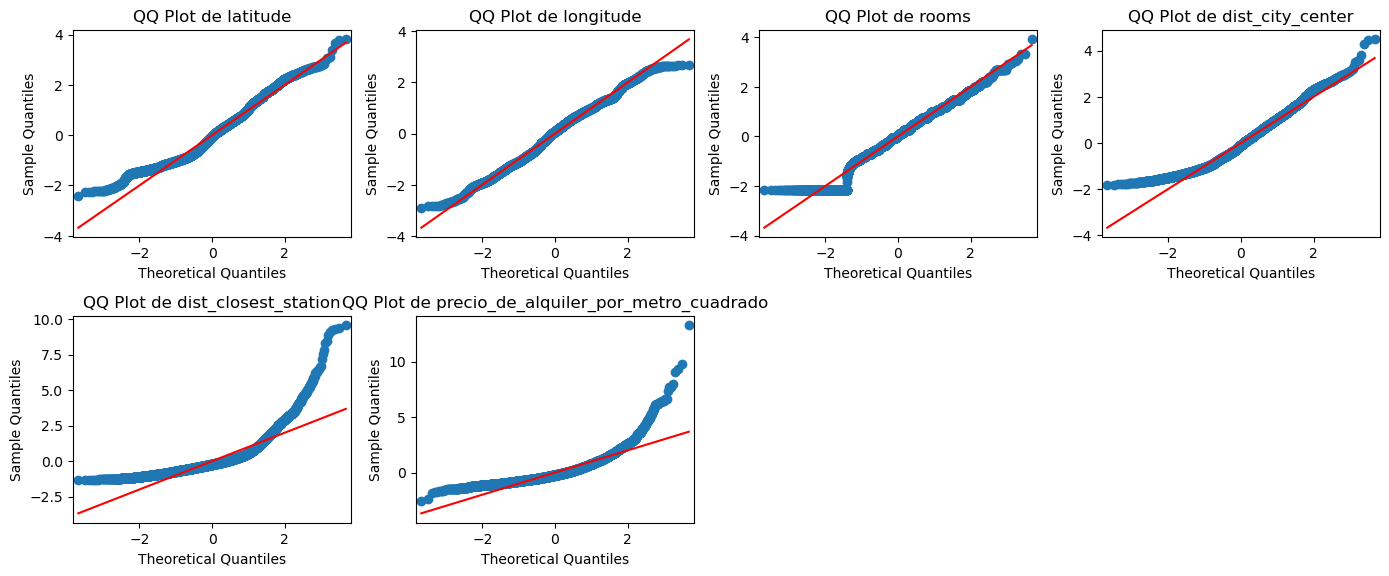

In [235]:
plt.figure(figsize=(14, 14))

for i, columna in enumerate(data_cont, 1):
    plt.subplot(5, 4, i)
    sm.qqplot(data_cont[columna], line='s', fit=True, ax=plt.gca())
    plt.title(f'QQ Plot de {columna}')

plt.tight_layout()
plt.show()

Parece ser que las variables de latitud y longitud, efectivamente parecen seguir una normal.

In [132]:
tonto = [var for var in data.columns if len(data[var].unique()) <= 1]
tonto

['quality']

Aqui vemos como la variable quality solo tiene una sola categoria por lo que me deshare de ella junto con closest station ya que ya tenemos dist_closest_station y  cluster ya que no vamos a usarla.

In [133]:
data = data.drop(['quality', 'closest_station', 'cluster'], axis='columns')

In [134]:
cont_features = ['dist_city_center', 'dist_closest_station']
data_cat = data.drop(cont_features, axis = 1)

variables = data_cat.columns.drop('precio_de_alquiler_por_metro_cuadrado')  
resultados_anova = pd.DataFrame(columns=['Variable', 'F_Value', 'P_Value'])

for variable in variables:
    formula = f'precio_de_alquiler_por_metro_cuadrado ~ {variable}'  # Usa C() para tratar explícitamente la variable como categórica
    anova_result = ols(formula, data=data_cat).fit()
    anova_table = sm.stats.anova_lm(anova_result, typ=2)  # Type 2 ANOVA DataFrame

    f_value = anova_table['F'][0]
    p_value = anova_table['PR(>F)'][0]

    # Añade los resultados usando .loc para mejorar la eficiencia
    resultados_anova.loc[len(resultados_anova.index)] = [variable, f_value, p_value]

# Imprime los resultados del ANOVA
print(resultados_anova)

            Variable      F_Value        P_Value
0           latitude   501.200424  6.562945e-108
1          longitude     1.594282   2.067501e-01
2              rooms   467.899091  4.704015e-101
3          bathrooms  3119.683409   0.000000e+00
4            balcony    12.673616   3.728771e-04
5            terrace   106.447463   8.238357e-25
6           exterior    20.398956   6.371193e-06
7        orientation     4.513078   1.214656e-03
8              floor    33.602834   7.000691e-09
9            rooftop   110.661436   1.009604e-25
10          elevator     1.389495   2.385234e-01
11              pool   349.657542   1.700531e-76
12                ac   714.459351  3.352694e-151
13           heating    50.061818   2.756611e-51
14         furniture    27.270214   1.811053e-07
15            garage    60.111482   9.998389e-15
16     property_type    55.847806   4.538113e-89
17  categoria_barrio  1407.507959  3.485571e-285


Segun este test ANOVA, todas las variables a excepcion de elevator y longitud, afectan a la variable objetivo por lo que es posible que lo mejor sea deshacernos de ellas. Por otro lado observamos como otras variables como latitud, ac o el barrio son altamente significativas.

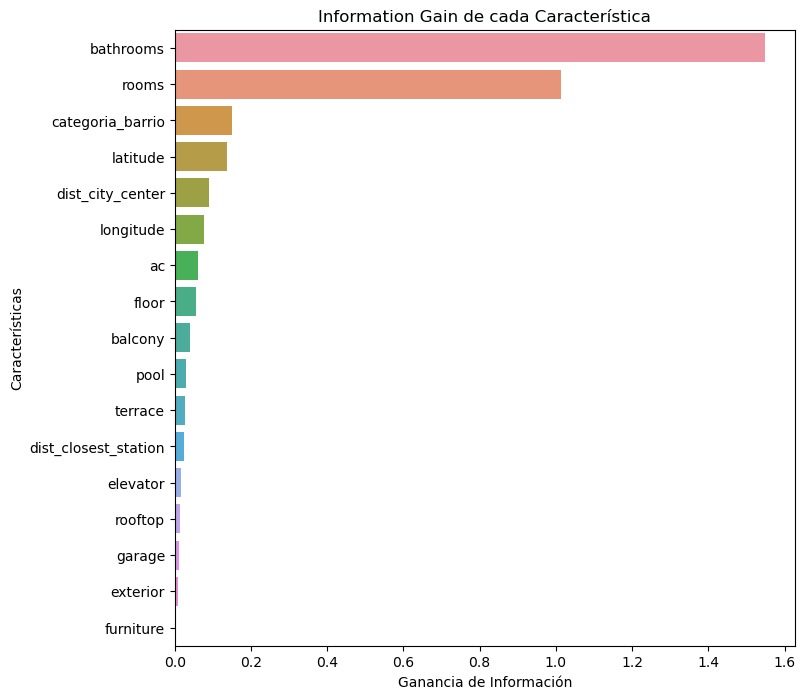

In [135]:
from sklearn.feature_selection import mutual_info_regression

def calculate_information_gain(X, y):
    mi = mutual_info_regression(X, y)
    mi = pd.Series(mi, index=X.columns)
    mi = mi.sort_values(ascending=False)
    return mi

X = data.drop(['precio_de_alquiler_por_metro_cuadrado', 'orientation', 'property_type', 'heating'], axis=1)
y = data['precio_de_alquiler_por_metro_cuadrado']
mi_scores = calculate_information_gain(X, y)

# Visualizar
plt.figure(figsize=(8, 8))
sns.barplot(x=mi_scores, y=mi_scores.index)
plt.title('Information Gain de cada Característica')
plt.xlabel('Ganancia de Información')
plt.ylabel('Características')
plt.show()

Lo que observamos en este analisis de entropias es realmente interesante, puesto que vemos que las variables de baños y habitaciones aportan la inmensa mayoria de la informacion y por lo contrario otras variables como furniture o exterior no aportan casi nada.

In [137]:
data = data.drop(['furniture'], axis='columns')
data.head()

latitude  longitude     rooms  bathrooms  balcony  terrace  exterior  \
0  41.401708   2.154077  0.036364   0.018182      0.0      0.0       1.0   
1  41.407221   2.135569  0.054054   0.027027      1.0      0.0       1.0   
2  41.411508   2.164608  0.041667   0.013889      0.0      0.0       1.0   
3  41.402256   2.140764  0.022222   0.022222      1.0      0.0       1.0   
4  41.405327   2.146929  0.022222   0.022222      0.0      0.0       1.0   

  orientation  floor  rooftop  elevator  pool   ac  heating  dist_city_center  \
0       norte    2.0      0.0       0.0   0.0  1.0  Unknown          2.026455   
1         sur    3.0      0.0       1.0   0.0  1.0  Unknown          3.582409   
2     Unknown    4.0      0.0       1.0   0.0  1.0  Unknown          2.663025   
3       norte    4.0      0.0       1.0   0.0  0.0  Unknown          2.910067   
4         sur    3.0      0.0       1.0   0.0  0.0      gas          2.727149   

   garage property_type  dist_closest_station  \
0     0.0          piso              0.094111   
1     0.0          piso              0.902561   
2     0.0          piso              0.188177   
3     0.0          piso              0.892917   
4     0.0          piso              0.293784   

   precio_de_alquiler_por_metro_cuadrado  categoria_barrio  
0                              15.454545                 3  
1                              19.594595                 3  
2                              13.194444                 2  
3                              16.666667                 3  
4                              22.000000                 4

A continuacion y para acabar con el tratamiento de los datos haré el one hot encoding de aquellas variables categoricas de texto.

In [138]:
#data['orientation'] = data['orientation'].astype('category').cat.codes
#data['heating'] = data['heating'].astype('category').cat.codes
#data['property_type'] = data['property_type'].astype('category').cat.codes

ohe = OneHotEncoder(handle_unknown='ignore')
ohe = OneHotEncoder(handle_unknown = 'ignore')
ohe.fit(data[['orientation', 'heating', 'property_type']])

df_encoded_onehot = pd.DataFrame(ohe.transform(data[['orientation', 'heating', 'property_type']]).toarray(), columns=ohe.get_feature_names_out(['orientation', 'heating', 'property_type']))
data = data.drop(columns=['orientation', 'heating', 'property_type'], axis=1)
data = pd.concat([data, df_encoded_onehot], axis=1)


In [139]:
data.head()

latitude  longitude     rooms  bathrooms  balcony  terrace  exterior  \
0  41.401708   2.154077  0.036364   0.018182      0.0      0.0       1.0   
1  41.407221   2.135569  0.054054   0.027027      1.0      0.0       1.0   
2  41.411508   2.164608  0.041667   0.013889      0.0      0.0       1.0   
3  41.402256   2.140764  0.022222   0.022222      1.0      0.0       1.0   
4  41.405327   2.146929  0.022222   0.022222      0.0      0.0       1.0   

   floor  rooftop  elevator  ...  heating_na  property_type_Unknown  \
0    2.0      0.0       0.0  ...         0.0                    0.0   
1    3.0      0.0       1.0  ...         0.0                    0.0   
2    4.0      0.0       1.0  ...         0.0                    0.0   
3    4.0      0.0       1.0  ...         0.0                    0.0   
4    3.0      0.0       1.0  ...         0.0                    0.0   

   property_type_atico  property_type_chalet  property_type_chalet_adosado  \
0                  0.0                   0.0                           0.0   
1                  0.0                   0.0                           0.0   
2                  0.0                   0.0                           0.0   
3                  0.0                   0.0                           0.0   
4                  0.0                   0.0                           0.0   

   property_type_chalet_independiente  property_type_chalet_pareado  \
0                                 0.0                           0.0   
1                                 0.0                           0.0   
2                                 0.0                           0.0   
3                                 0.0                           0.0   
4                                 0.0                           0.0   

   property_type_duplex  property_type_estudio  property_type_piso  
0                   0.0                    0.0                 1.0  
1                   0.0                    0.0                 1.0  
2                   0.0                    0.0                 1.0  
3                   0.0                    0.0                 1.0  
4                   0.0                    0.0                 1.0  

[5 rows x 37 columns]

### Conclusiones

En este analisis hemos visto como nuestros datos no parecen ser muy explicativos de la variable objetivo, para tratar de mejorar la calidad de los datos he tratado los valores nulos, los categoricos de texto, he aplicado transformaciones a ciertas variables y por último he aplicado one hot encoding para mis variables categoricas. 

Hemos podido observar como las variables que mas prometian eran las habitaciones y los baños, seguido de los barrios y la latitud, a continuación en los modelos veremos si esto ha sido suficiente.

## Creación y comparación de modelos

### Bagging

In [140]:
X = data.drop(['precio_de_alquiler_por_metro_cuadrado'], axis = 1)
y = data[['precio_de_alquiler_por_metro_cuadrado']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [142]:
parameters = [{"max_depth":[2,4,6,8,10], "min_samples_split":[2,6,10, 15,20]}]

decision_tree_model = DecisionTreeRegressor()

# Grid search function
grid_tree = GridSearchCV(cv = 10, estimator=decision_tree_model, param_grid=parameters, scoring="r2")
grid_tree.fit(X_train, y_train)
grid_tree.best_params_

{'max_depth': 6, 'min_samples_split': 15}

In [ ]:
max_depth = grid_tree.best_params_["max_depth"]
min_samples_split = grid_tree.best_params_["min_samples_split"]

In [ ]:
parameters = {"n_estimators":[10, 50,100, 200]}

decision_tree_model = DecisionTreeRegressor(max_depth = max_depth, min_samples_split = min_samples_split)

bagging_model = BaggingRegressor(decision_tree_model)

grid_bag = GridSearchCV(cv = 10, 
                        estimator=bagging_model, 
                        param_grid=parameters, 
                        scoring="r2")
grid_bag.fit(X_train, y_train)
grid_bag.best_params_

{'n_estimators': 200}

In [ ]:
n_estimators = grid_bag.best_params_["n_estimators"]
best_bagging_model = grid_bag.best_estimator_

Una vez he encontrado los parametros mas optimos voy a crear el modelo y usar cross validation para su validacion.

In [ ]:
bag = BaggingRegressor(DecisionTreeRegressor(max_depth = max_depth, min_samples_split = min_samples_split), n_estimators = n_estimators)
bagging_cv = cross_validate(bag, X_train, y_train, cv = 10, scoring = "r2")

In [ ]:
for i, score in enumerate(bagging_cv["test_score"]):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: 0.5265724952858717
Accuracy for the fold no. 1 on the test set: 0.48742228982800395
Accuracy for the fold no. 2 on the test set: 0.49927192886383664
Accuracy for the fold no. 3 on the test set: 0.4435396416221986
Accuracy for the fold no. 4 on the test set: 0.5506796146983164
Accuracy for the fold no. 5 on the test set: 0.4439304705551731
Accuracy for the fold no. 6 on the test set: 0.5156430120999778
Accuracy for the fold no. 7 on the test set: 0.5544639573631311
Accuracy for the fold no. 8 on the test set: 0.6006613107333472
Accuracy for the fold no. 9 on the test set: 0.4699051361558989


Vemos como algunos folds tienen mucha mas accuracy que otros, probablemente porque al tener ciertas variables categoricas en la que predomina una de las categorias, a veces no caeran los valores mas optimos dentro de los folds.

In [ ]:
y_pred_train = best_bagging_model.predict(X_train)
y_pred_test = best_bagging_model.predict(X_test)

Train error

In [ ]:
r2_train_bagging = metrics.r2_score(y_train, y_pred_train)
r2_train_bagging

0.6457427055154024

Test error

In [ ]:
r2_validation_bagging = metrics.r2_score(y_test, y_pred_test)
r2_validation_bagging

0.5541301763378079

In [178]:
# Creamos el diccionario y el DataFrame vacío
cv = {}
results = pd.DataFrame(columns=['model','mean_r2_cv_test','r2_train','r2_validation'])

# Guardamos los resultados de Bagging entrenado con el dataset reducido
cv['decision_tree_bagging_reduced'] = bagging_cv["test_score"]
model_bagging_results = ['decision_tree_bagging_reduced', np.mean(bagging_cv["test_score"]), r2_train_bagging, r2_validation_bagging]
results = pd.concat([results,pd.DataFrame([model_bagging_results], columns=results.columns)], ignore_index=True)

results

model  mean_r2_cv_test  r2_train  r2_validation
0  decision_tree_bagging_reduced         0.509209  0.645743        0.55413

El modelo deja bastante que desear, con un poco de overfitting y un r2 realmente bajo, no parece un modelo muy fiable.

In [ ]:
r2_wl_list = []

for weak_learner in best_bagging_model.estimators_:
    y_pred_test = weak_learner.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    r2_wl_list.append(r2_test)
    
print("r2_validation media de los weak learners "+str(np.mean(r2_wl_list)))
print("r2_validation del strong learner "+str(results["r2_validation"][0]))

r2_validation media de los weak learners 0.39145290479671885
r2_validation del strong learner 0.5541301763378079


### Random Forest

In [ ]:
parameters = {"n_estimators":[100,150,200], "max_depth": [5,10,15]}

#instantiate the classifier
rf = RandomForestRegressor()

# Grid search function
grid_rf = GridSearchCV(cv = 10, estimator=rf, param_grid=parameters, scoring="r2")
grid_rf.fit(X_train, y_train)
grid_rf.best_params_

{'max_depth': 15, 'n_estimators': 150}

In [ ]:
n_estimators = grid_rf.best_params_["n_estimators"]
max_depth = grid_rf.best_params_["max_depth"]

# La función "GridSearchCV" reentrena el modelo utilizando los mejores parámetros 
# encontrados (usando cross-validation) en todo el conjunto de datos de train.
best_rf_model = grid_rf.best_estimator_

In [ ]:
# Creamos el modelo con los hiperpametros seleccionados en el punto anterior
rf = RandomForestRegressor(max_depth = max_depth, n_estimators = n_estimators)
# Entrenamos el modelo con el dataset de entrenamiento mediante cross validation
rf_cv = cross_validate(rf, X_train, y_train, cv = 10, scoring = "r2")

In [ ]:
for i, score in enumerate(rf_cv["test_score"]):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: 0.5444784944238285
Accuracy for the fold no. 1 on the test set: 0.5248360201458433
Accuracy for the fold no. 2 on the test set: 0.5497089927501468
Accuracy for the fold no. 3 on the test set: 0.4826035322049481
Accuracy for the fold no. 4 on the test set: 0.6152329473798501
Accuracy for the fold no. 5 on the test set: 0.4712267554447497
Accuracy for the fold no. 6 on the test set: 0.5350783799712802
Accuracy for the fold no. 7 on the test set: 0.5972814865691114
Accuracy for the fold no. 8 on the test set: 0.6376555270615691
Accuracy for the fold no. 9 on the test set: 0.4905334731623314


Nos encontramos un poco igual que en el bagging pero con algo menos de diferencia entre los folds, posiblemente debido a la naturaleza del muestreo de columnas de random forest.

In [ ]:
y_pred_train = best_rf_model.predict(X_train)
y_pred_test = best_rf_model.predict(X_test)

In [ ]:
r2_train_rf = metrics.r2_score(y_train, y_pred_train)
r2_train_rf

0.9047386019373281

In [ ]:
r2_validation_rf = metrics.r2_score(y_test, y_pred_test)
r2_validation_rf

0.5849027986349107

In [179]:
# Guardamos los resultados de RF
cv['rf'] = rf_cv["test_score"]
model_rf_results = ['rf', np.mean(rf_cv["test_score"]), r2_train_rf, r2_validation_rf]
results = pd.concat([results,pd.DataFrame([model_rf_results], columns=results.columns)], ignore_index=True)

results

model  mean_r2_cv_test  r2_train  r2_validation
0  decision_tree_bagging_reduced         0.509209  0.645743       0.554130
1                             rf         0.544864  0.904739       0.584903

Hemos obtenido resultados algo mejores que con baggin, pero el overfitting del modelo se ha disparado drásticamente tal y como podemos apreciar por la diferencia en el r2 entre el test y el train.

### Boosting

Para el boosting, y para preparar tambien el camino para la parte del break-even con el otro dataset, voy a crear una celda con todo el proceso de tratamiento de los datos, con la única diferncia que no haré one hot encoding puesto que no es del todo necesario para catboost.

In [209]:
#lectura datos
data_catboost = pd.read_csv('./0_processed_renting_Barcelona.csv', delimiter = ',')
data_catboost['precio_de_alquiler_por_metro_cuadrado'] = data_catboost['price'] / data_catboost['sq_meters_built']
data_catboost['rooms'] = data_catboost['rooms'] / data_catboost['sq_meters_built']
data_catboost['bathrooms'] = data_catboost['bathrooms'] / data_catboost['sq_meters_built']

data_catboost = data_catboost.drop(['currency', 'city', 'created_at', 'last_seen', 'id', 'year_built', 'sq_meters', 'sq_meters_built', 'price', 'doorman', 'garden'], axis='columns')


data_catboost['orientation'].fillna("Unknown", inplace = True) 
data_catboost['heating'].fillna("Unknown", inplace = True) 
data_catboost['property_type'].fillna("Unknown", inplace = True) 

features_to_null = ['balcony', 'terrace', 'exterior', 'floor', 'rooftop', 'elevator', 'pool', 'ac', 'garage', 'furniture']
for i in range(0,len(features_to_null)):
   data_catboost[features_to_null[i]].fillna(0, inplace = True) 


precio_medio_barrio = data_catboost.groupby('neighborhood')['precio_de_alquiler_por_metro_cuadrado'].mean().reset_index(name='precio_medio')

percentil_20 = precio_medio_barrio['precio_medio'].quantile(0.20)
percentil_40 = precio_medio_barrio['precio_medio'].quantile(0.40)
percentil_60 = precio_medio_barrio['precio_medio'].quantile(0.60)
percentil_80 = precio_medio_barrio['precio_medio'].quantile(0.80)


def categorizar_precio(precio):
    if precio <= percentil_20:
        return 0
    elif precio <= percentil_40:
        return 1
    elif precio <= percentil_60:
        return 2
    elif precio <= percentil_80:
        return 3
    else:
        return 4
    
precio_medio_barrio['categoria'] = precio_medio_barrio['precio_medio'].apply(categorizar_precio)

# Crear un diccionario para mapear los barrios a sus categorías
diccionario_categorias = precio_medio_barrio.set_index('neighborhood')['categoria'].to_dict()

# Paso 4: Mapear las categorías de vuelta al DataFrame original
data_catboost['categoria_barrio'] = data_catboost['neighborhood'].map(diccionario_categorias)
data_catboost = data_catboost.drop(['neighborhood'], axis='columns')

data_catboost = data_catboost.drop(['quality', 'closest_station'], axis='columns')
data_catboost = data_catboost.drop(['furniture'], axis='columns')

#data_catboost['orientation'] = data_catboost['orientation'].astype('category').cat.codes
#data_catboost['heating'] = data_catboost['orientation'].astype('category').cat.codes
#data_catboost['property_type'] = data_catboost['orientation'].astype('category').cat.codes

cat_features = ['orientation', 'heating', 'property_type']

data_catboost.head()

latitude  longitude     rooms  bathrooms  balcony  terrace  exterior  \
0  41.401708   2.154077  0.036364   0.018182      0.0      0.0       1.0   
1  41.407221   2.135569  0.054054   0.027027      1.0      0.0       1.0   
2  41.411508   2.164608  0.041667   0.013889      0.0      0.0       1.0   
3  41.402256   2.140764  0.022222   0.022222      1.0      0.0       1.0   
4  41.405327   2.146929  0.022222   0.022222      0.0      0.0       1.0   

  orientation  floor  rooftop  elevator  pool   ac  heating  dist_city_center  \
0       norte    2.0      0.0       0.0   0.0  1.0  Unknown          2.026455   
1         sur    3.0      0.0       1.0   0.0  1.0  Unknown          3.582409   
2     Unknown    4.0      0.0       1.0   0.0  1.0  Unknown          2.663025   
3       norte    4.0      0.0       1.0   0.0  0.0  Unknown          2.910067   
4         sur    3.0      0.0       1.0   0.0  0.0      gas          2.727149   

   garage property_type  dist_closest_station  \
0     0.0          piso              0.094111   
1     0.0          piso              0.902561   
2     0.0          piso              0.188177   
3     0.0          piso              0.892917   
4     0.0          piso              0.293784   

   precio_de_alquiler_por_metro_cuadrado  categoria_barrio  
0                              15.454545                 3  
1                              19.594595                 3  
2                              13.194444                 2  
3                              16.666667                 3  
4                              22.000000                 4

In [212]:
import catboost as cat
import shap

X = data_catboost.drop(['precio_de_alquiler_por_metro_cuadrado'], axis = 1)
y = data_catboost[['precio_de_alquiler_por_metro_cuadrado']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# create a train/test split with catboost
d_train_cat = cat.Pool(X_train, y_train, cat_features=cat_features)
d_test_cat = cat.Pool(X_test, y_test, cat_features=cat_features)

In [213]:
model = cat.CatBoostRegressor()

grid = {'learning_rate': [0.015, 0.03],
        'depth': [6, 8, 10, 12]}

grid_search_result = model.grid_search(grid, d_train_cat, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 16.6198078	test: 16.4721014	best: 16.4721014 (0)	total: 41.2ms	remaining: 41.2s
1:	learn: 16.3993570	test: 16.2504901	best: 16.2504901 (1)	total: 71.9ms	remaining: 35.9s
2:	learn: 16.1810297	test: 16.0297948	best: 16.0297948 (2)	total: 91.5ms	remaining: 30.4s
3:	learn: 15.9617478	test: 15.8073980	best: 15.8073980 (3)	total: 126ms	remaining: 31.5s
4:	learn: 15.7457552	test: 15.5900018	best: 15.5900018 (4)	total: 164ms	remaining: 32.6s
5:	learn: 15.5347873	test: 15.3753375	best: 15.3753375 (5)	total: 206ms	remaining: 34.2s
6:	learn: 15.3299044	test: 15.1664125	best: 15.1664125 (6)	total: 246ms	remaining: 34.9s
7:	learn: 15.1278263	test: 14.9613010	best: 14.9613010 (7)	total: 297ms	remaining: 36.9s
8:	learn: 14.9300037	test: 14.7606729	best: 14.7606729 (8)	total: 341ms	remaining: 37.6s
9:	learn: 14.7312327	test: 14.5589848	best: 14.5589848 (9)	total: 380ms	remaining: 37.6s
10:	learn: 14.5374639	test: 14.3620591	best: 14.3620591 (10)	total: 420ms	remaining: 37.7s
11:	learn: 14.34

In [214]:
grid_search_result['params']

{'depth': 8, 'learning_rate': 0.03}

Tal y como vemos en el grafico dinamico esta es la configuracion con menos error y menos overfitting.

In [215]:
# Model cross validation
params = {"iterations": 1600
          , "depth": 8
          , "loss_function": "RMSE"
          , "learning_rate": 0.03
          , "verbose": False
          , "subsample": 0.8}

scores = cat.cv(d_train_cat
            , params
            , fold_count = 10
            , plot = "True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/10]

bestTest = 3.493908457
bestIteration = 1318

Training on fold [1/10]

bestTest = 4.487768337
bestIteration = 1591

Training on fold [2/10]

bestTest = 3.208232093
bestIteration = 1598

Training on fold [3/10]

bestTest = 3.904796915
bestIteration = 1530

Training on fold [4/10]

bestTest = 3.368465075
bestIteration = 1598

Training on fold [5/10]

bestTest = 3.797274494
bestIteration = 1550

Training on fold [6/10]

bestTest = 3.249300794
bestIteration = 1383

Training on fold [7/10]

bestTest = 3.767869861
bestIteration = 1578

Training on fold [8/10]

bestTest = 2.897514563
bestIteration = 1599

Training on fold [9/10]

bestTest = 3.575459129
bestIteration = 1580



In [216]:
model_cat = cat.CatBoostRegressor(iterations = 1600
                                  , learning_rate = 0.03
                                  , loss_function = "RMSE"
                                  , random_seed = 7
                                  , depth = 8
                                  , subsample=0.8)

model_cat.fit(d_train_cat
                , eval_set = d_test_cat
                , verbose_eval=500
                , plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 5.4209100	test: 5.6448820	best: 5.6448820 (0)	total: 49.5ms	remaining: 1m 19s
500:	learn: 2.9429542	test: 3.6417307	best: 3.6414264 (499)	total: 29s	remaining: 1m 3s
1000:	learn: 2.5421349	test: 3.5837214	best: 3.5833445 (996)	total: 56s	remaining: 33.5s
1500:	learn: 2.2089020	test: 3.5560257	best: 3.5556461 (1475)	total: 1m 22s	remaining: 5.44s
1599:	learn: 2.1437180	test: 3.5519784	best: 3.5517724 (1598)	total: 1m 27s	remaining: 0us

bestTest = 3.551772435
bestIteration = 1598

Shrink model to first 1599 iterations.


In [217]:
# Predicción con los datos train
y_pred_train = model_cat.predict(X_train)
r2_train_cat = metrics.r2_score(y_train, y_pred_train)

# Predicción con los datos train
y_pred_test = model_cat.predict(X_test)
r2_test_cat = metrics.r2_score(y_test, y_pred_test)

print('R2 para la predicción con los datos train: ', r2_train_cat)
print('R2 para la predicción con los datos test: ', r2_test_cat)

R2 para la predicción con los datos train:  0.8295296349843778
R2 para la predicción con los datos test:  0.6140144581574887


In [219]:
# Guardamos los resultados de RF
model_catboost_results = ['catboost', np.nan, r2_train_cat, r2_test_cat]
results = pd.concat([results,pd.DataFrame([model_catboost_results], columns=results.columns)], ignore_index=True)

results

model  mean_r2_cv_test  r2_train  r2_validation
0  decision_tree_bagging_reduced         0.509209  0.645743       0.554130
1                             rf         0.544864  0.904739       0.584903
2                       catboost              NaN  0.829530       0.614014

Hemos conseguido reducir un poco el overfitting al mismo tiempo que aumentar el r2.

In [220]:
cat_importance = pd.DataFrame({"Features": model_cat.feature_names_
                               , "Importance": model_cat.feature_importances_}
                             ).sort_values('Importance', ascending=False)

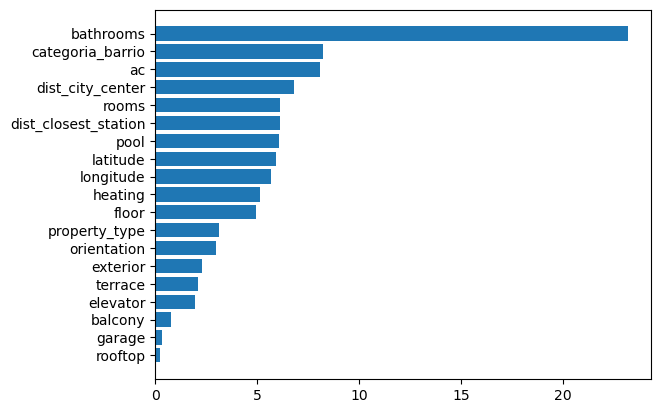

In [221]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(y = 'Features'
        , width = 'Importance'
        , data = cat_importance)
ax.invert_yaxis()  # labels read top-to-bottom

Vemos como la variable de baños es sin lugar a duda la que mas informacion aporta al modelo.

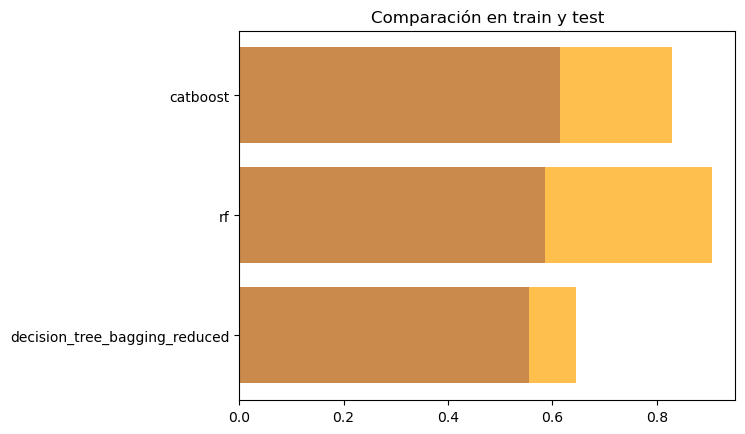

In [222]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Barra para r2_validation con transparencia
ax.barh(data=results.sort_values('r2_validation', ascending=False),
        y='model',
        width='r2_validation',
        color='blue',
        alpha=0.7,  # Ajusta el valor de alpha según lo deseado
        label='r2_validation')

# Barra para r2_train con transparencia
ax.barh(data=results.sort_values('r2_train', ascending=False),
        y='model',
        width='r2_train',
        color='orange',
        alpha=0.7,  # Ajusta el valor de alpha según lo deseado
        label='r2_train')

ax.set_title("Comparación en train y test")
ax.invert_yaxis()
plt.show()

En este grafico observamos lo que ya se ha ido viendo, el algoritmo de catboost nos ofrece el mayor r2, con bastante overfitting pero mucho menor al del random forest.

## Análisis de Shap values para el modelo de boosting escogido

In [223]:
shap.initjs()

# Cálculo Shap Values
explainer_cat = shap.TreeExplainer(model_cat)
shap_values_cat = explainer_cat.shap_values(X_train)

In [224]:
print("CATBoost Shap visualization for instance 0")
shap.force_plot(explainer_cat.expected_value, shap_values_cat[0,:], X_train.iloc[0,:])

CATBoost Shap visualization for instance 0


Aqui vemos las decisiones que toma el algoritmo para ofrecer su prediccion, y tal y como hemos visto con las feature importances, los baños son la variable que mas aporta en la prediccion.

In [225]:
shap.force_plot(explainer_cat.expected_value, shap_values_cat[0:1000], X_train[0:1000])

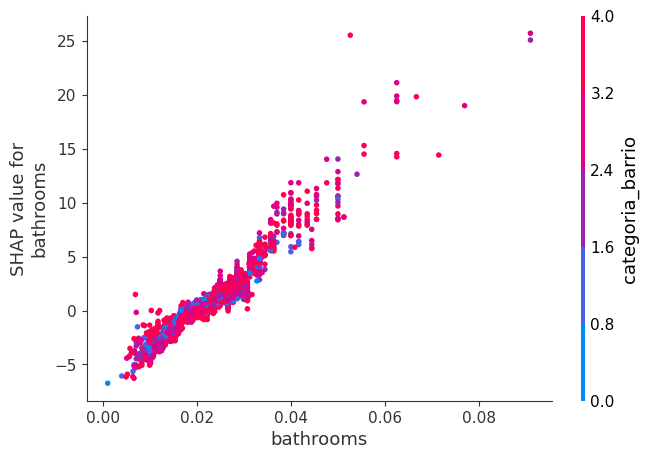

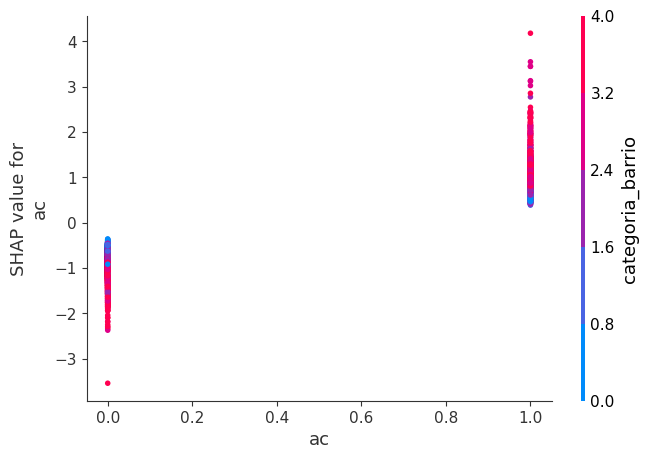

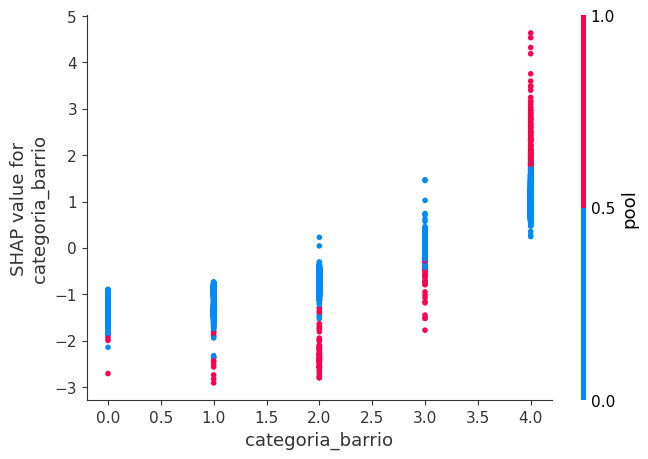

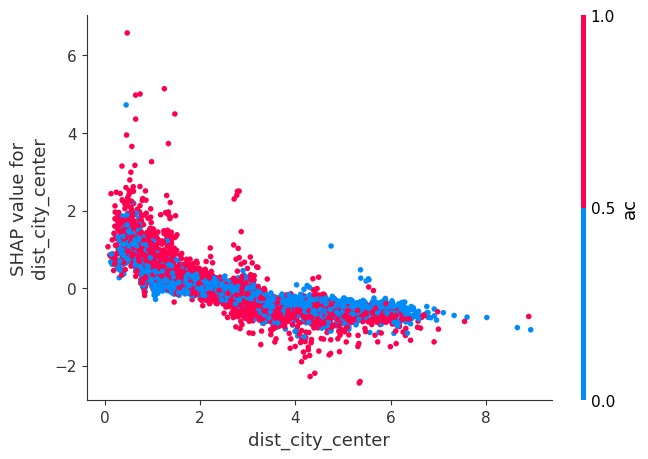

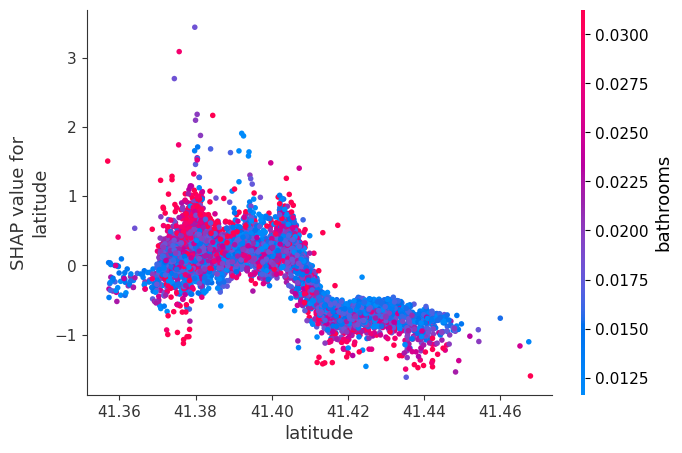

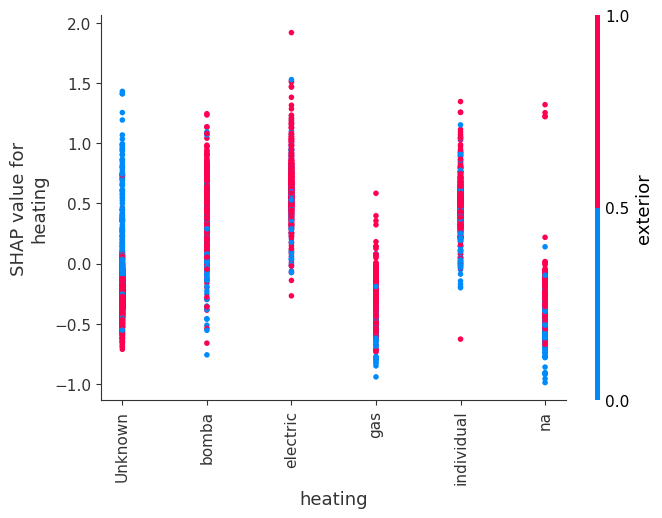

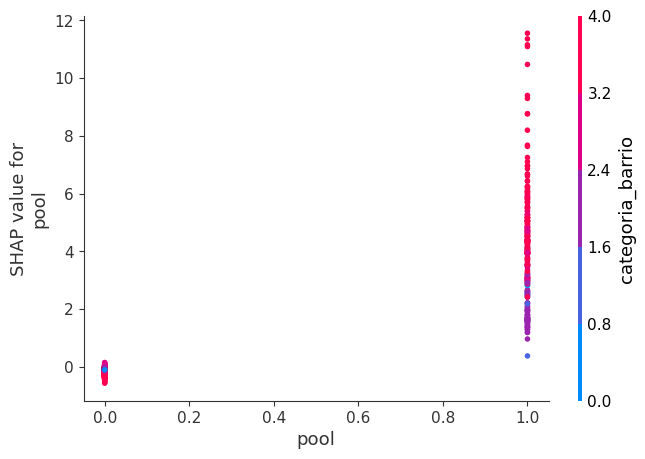

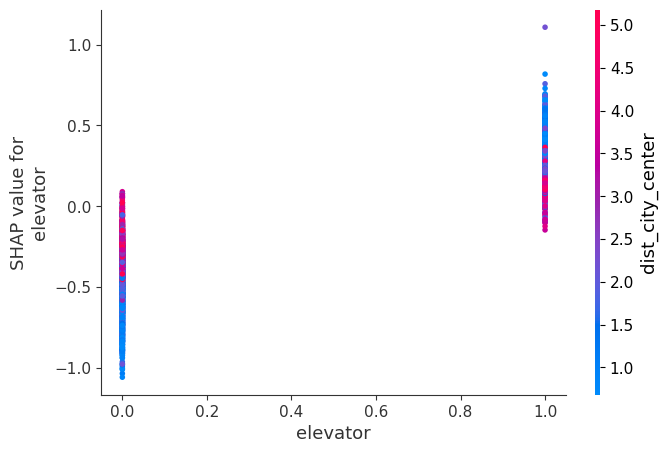

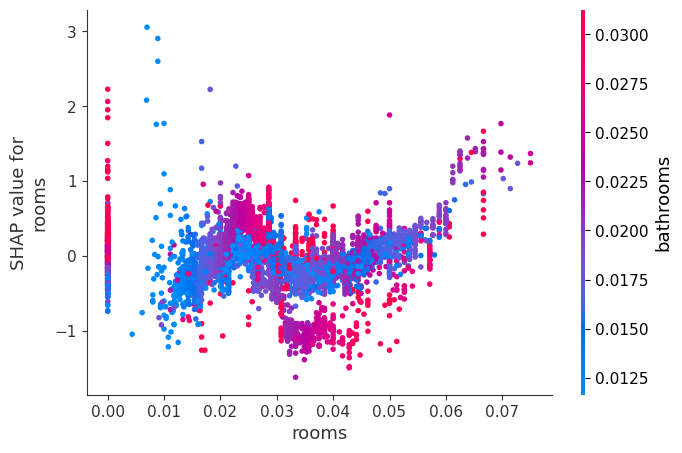

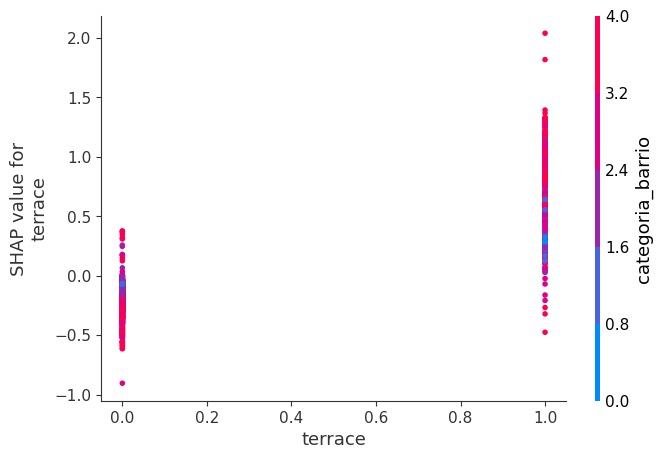

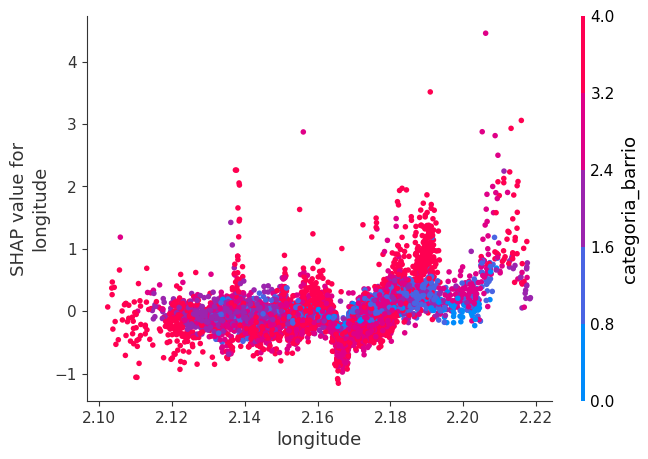

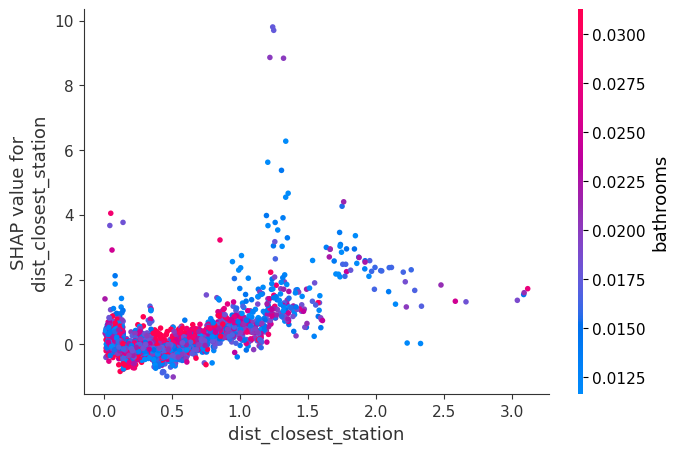

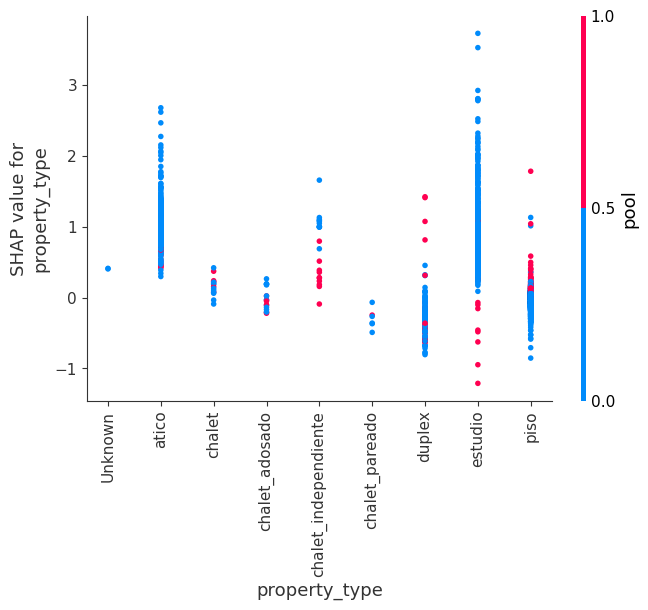

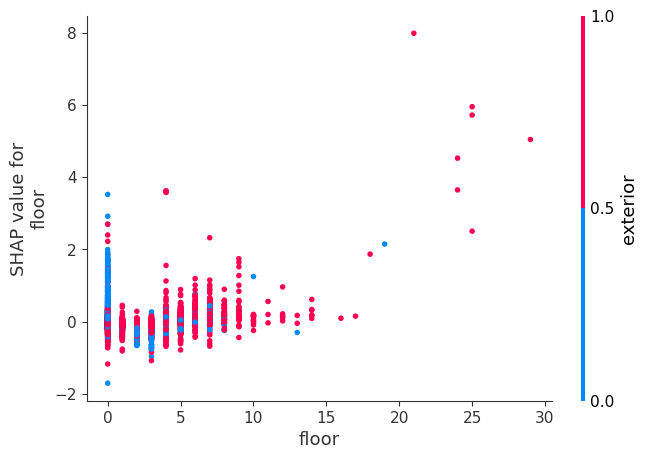

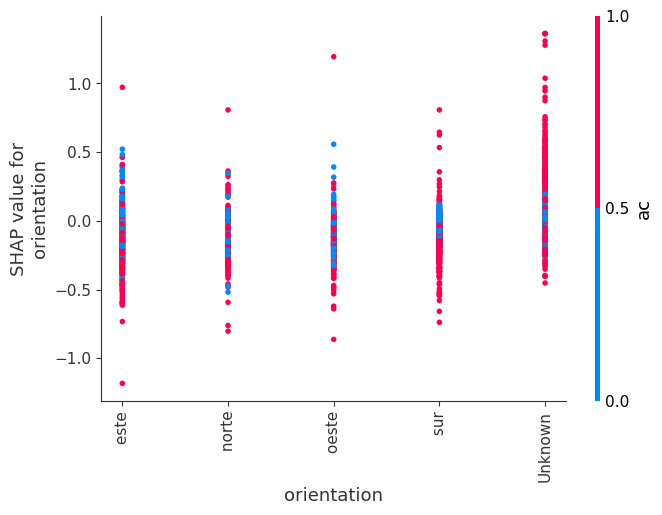

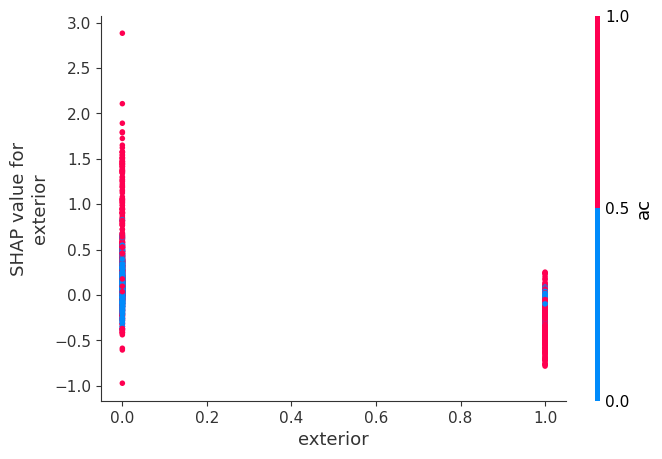

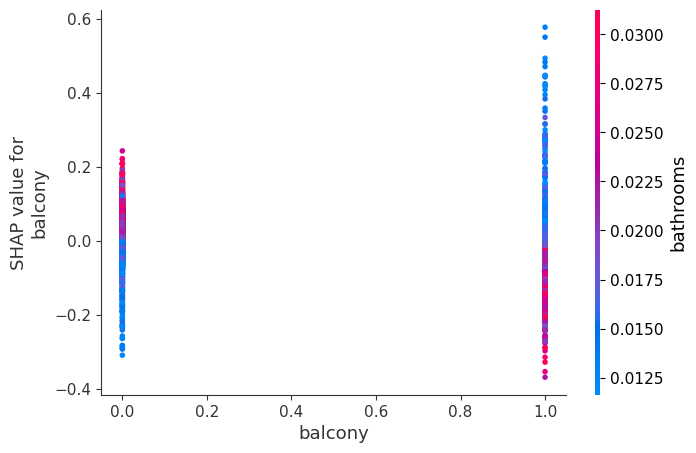

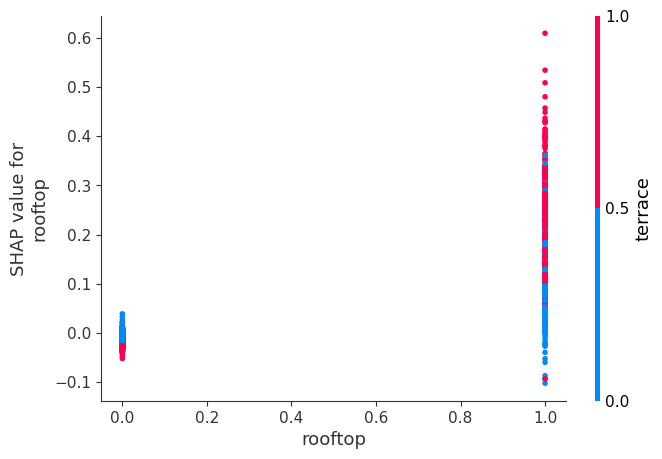

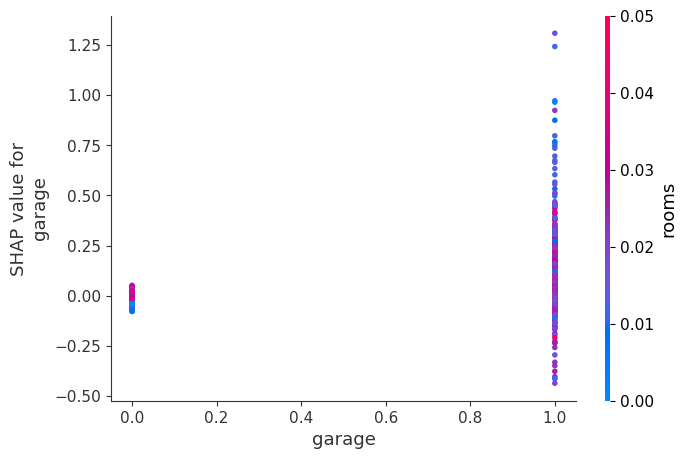

In [226]:
top_inds = np.argsort(-np.sum(np.abs(shap_values_cat), 0))

for i in range(0,len(top_inds)):
    shap.dependence_plot(top_inds[i], shap_values_cat, X_train)

## Generación de predicciones en el dataset de venta y selección de las 20 viviendas más rentables y más baratas para comprar

In [227]:
#lectura datos
data_sell = pd.read_csv('./0_processed_sale_Barcelona.csv', delimiter = ',')

#data_sell['precio_de_alquiler_por_metro_cuadrado'] = data_sell['price'] / data_sell['sq_meters_built']
data_sell['rooms'] = data_sell['rooms'] / data_sell['sq_meters_built']
data_sell['bathrooms'] = data_sell['bathrooms'] / data_sell['sq_meters_built']

data_sell = data_sell.drop(['currency', 'city', 'created_at', 'last_seen', 'id', 'year_built', 'sq_meters', 'doorman', 'garden'], axis='columns')


data_sell['orientation'].fillna("Unknown", inplace = True) 
data_sell['heating'].fillna("Unknown", inplace = True) 
data_sell['property_type'].fillna("Unknown", inplace = True) 

features_to_null = ['balcony', 'terrace', 'exterior', 'floor', 'rooftop', 'elevator', 'pool', 'ac', 'garage', 'furniture']
for i in range(0,len(features_to_null)):
   data_sell[features_to_null[i]].fillna(0, inplace = True) 


precio_medio_barrio = data_sell.groupby('neighborhood')['price'].mean().reset_index(name='precio_medio')

percentil_20 = precio_medio_barrio['precio_medio'].quantile(0.20)
percentil_40 = precio_medio_barrio['precio_medio'].quantile(0.40)
percentil_60 = precio_medio_barrio['precio_medio'].quantile(0.60)
percentil_80 = precio_medio_barrio['precio_medio'].quantile(0.80)


def categorizar_precio(precio):
    if precio <= percentil_20:
        return 0
    elif precio <= percentil_40:
        return 1
    elif precio <= percentil_60:
        return 2
    elif precio <= percentil_80:
        return 3
    else:
        return 4
    
precio_medio_barrio['categoria'] = precio_medio_barrio['precio_medio'].apply(categorizar_precio)

# Crear un diccionario para mapear los barrios a sus categorías
diccionario_categorias = precio_medio_barrio.set_index('neighborhood')['categoria'].to_dict()

# Paso 4: Mapear las categorías de vuelta al DataFrame original
data_sell['categoria_barrio'] = data_sell['neighborhood'].map(diccionario_categorias)
data_sell = data_sell.drop(['neighborhood'], axis='columns')

data_sell = data_sell.drop(['quality', 'closest_station'], axis='columns')
data_sell = data_sell.drop(['furniture'], axis='columns')

#data_sell['orientation'] = data_sell['orientation'].astype('category').cat.codes
#data_sell['heating'] = data_sell['orientation'].astype('category').cat.codes
#data_sell['property_type'] = data_sell['orientation'].astype('category').cat.codes

data_sell_price = data_sell
data_sell.drop(['price', 'sq_meters_built'], axis='columns')

data_sell.head()

price   latitude  longitude  sq_meters_built     rooms  bathrooms  \
0  150000  41.459649   2.174793               67  0.044776   0.014925   
1  150000  41.422081   2.155370               52  0.038462   0.019231   
2  395000  41.402928   2.207851               91  0.021978   0.021978   
3  540000  41.394692   2.144422              100  0.030000   0.010000   
4  650000  41.398971   2.120754              141  0.021277   0.014184   

   balcony  terrace  exterior orientation  ...  rooftop  elevator  pool   ac  \
0      0.0      1.0       1.0        este  ...      0.0       0.0   0.0  1.0   
1      0.0      0.0       1.0     Unknown  ...      0.0       0.0   0.0  1.0   
2      0.0      0.0       1.0     Unknown  ...      0.0       0.0   0.0  1.0   
3      0.0      0.0       1.0         sur  ...      0.0       1.0   0.0  1.0   
4      0.0      0.0       1.0        este  ...      0.0       1.0   0.0  1.0   

      heating dist_city_center  garage  property_type dist_closest_station  \
0     Unknown         7.990993     0.0           piso             0.121438   
1  individual         3.991000     0.0           piso             0.277336   
2    electric         3.579261     0.0         duplex             0.383878   
3     Unknown         2.257852     1.0           piso             0.875652   
4     Unknown         4.283368     1.0           piso             1.310073   

   categoria_barrio  
0                 0  
1                 0  
2                 3  
3                 4  
4                 4  

[5 rows x 21 columns]

Para calcular que pisos son los mas rentables, dividire el precio del piso entre el precio de alquiler por mes predecido, es decir, por el producto entre la prediccion y el numero de metros cuadrados de la vivienda.

In [228]:
d_sell_cat = cat.Pool(data_sell, cat_features=cat_features)

# Predicción con los datos train
y_pred = model_cat.predict(d_sell_cat)
#r2_test_cat = metrics.r2_score(y_test, y_pred_test)

data_sell_price['precio_de_alquiler_por_metro_cuadrado'] = y_pred

data_sell_price['break_even'] = data_sell_price['price'] / (y_pred * data_sell_price['sq_meters_built'])

data_sell_price.head()

price   latitude  longitude  sq_meters_built     rooms  bathrooms  \
0  150000  41.459649   2.174793               67  0.044776   0.014925   
1  150000  41.422081   2.155370               52  0.038462   0.019231   
2  395000  41.402928   2.207851               91  0.021978   0.021978   
3  540000  41.394692   2.144422              100  0.030000   0.010000   
4  650000  41.398971   2.120754              141  0.021277   0.014184   

   balcony  terrace  exterior orientation  ...  pool   ac     heating  \
0      0.0      1.0       1.0        este  ...   0.0  1.0     Unknown   
1      0.0      0.0       1.0     Unknown  ...   0.0  1.0  individual   
2      0.0      0.0       1.0     Unknown  ...   0.0  1.0    electric   
3      0.0      0.0       1.0         sur  ...   0.0  1.0     Unknown   
4      0.0      0.0       1.0        este  ...   0.0  1.0     Unknown   

   dist_city_center  garage property_type  dist_closest_station  \
0          7.990993     0.0          piso              0.121438   
1          3.991000     0.0          piso              0.277336   
2          3.579261     0.0        duplex              0.383878   
3          2.257852     1.0          piso              0.875652   
4          4.283368     1.0          piso              1.310073   

   categoria_barrio precio_de_alquiler_por_metro_cuadrado  break_even  
0                 0                             12.028086  186.131520  
1                 0                             13.415726  215.017461  
2                 3                             15.964976  271.886363  
3                 4                             14.228700  379.514650  
4                 4                             15.027878  306.758476  

[5 rows x 23 columns]

Estos son los 20 pisos mas rentables:

In [229]:
most_profitable = data_sell_price.nsmallest(20, 'break_even')
most_profitable

price   latitude  longitude  sq_meters_built     rooms  bathrooms  \
410   29000  41.373778   2.155383               80  0.050000   0.025000   
1218  65000  41.426212   2.194950              118  0.025424   0.016949   
1800  35000  41.413491   2.172196               72  0.041667   0.013889   
3408  35000  41.384182   2.136309               52  0.038462   0.019231   
2896  28000  41.452706   2.191787               46  0.065217   0.021739   
5117  48000  41.375443   2.135500               40  0.000000   0.050000   
5697  35000  41.382492   2.135261               52  0.038462   0.019231   
5073  78000  41.376296   2.135159               70  0.014286   0.042857   
2829  40000  41.419486   2.163700               46  0.021739   0.021739   
123   45000  41.450812   2.177551               71  0.028169   0.014085   
1258  68000  41.383174   2.133605               53  0.000000   0.018868   
3105  89000  41.451726   2.173018              126  0.039683   0.015873   
2347  55000  41.387981   2.169028               59  0.033898   0.016949   
5546  39000  41.385017   2.153182               25  0.040000   0.040000   
1641  90000  41.422339   2.209688               85  0.023529   0.023529   
19    63000  41.423411   2.157112               90  0.000000   0.011111   
976   81500  41.357675   2.146614               78  0.025641   0.025641   
72    43000  41.428935   2.191123               15  0.000000   0.066667   
5292  63900  41.403487   2.164718               25  0.000000   0.040000   
4688  48000  41.372394   2.132785               40  0.025000   0.025000   

      balcony  terrace  exterior orientation  ...  pool   ac     heating  \
410       1.0      0.0       0.0     Unknown  ...   0.0  0.0  individual   
1218      1.0      0.0       0.0     Unknown  ...   0.0  1.0  individual   
1800      0.0      0.0       0.0     Unknown  ...   0.0  0.0  individual   
3408      1.0      0.0       1.0         sur  ...   0.0  0.0    electric   
2896      0.0      0.0       0.0     Unknown  ...   0.0  0.0     Unknown   
5117      0.0      0.0       0.0        este  ...   0.0  0.0     Unknown   
5697      1.0      0.0       1.0         sur  ...   0.0  0.0     Unknown   
5073      0.0      0.0       1.0     Unknown  ...   0.0  1.0         gas   
2829      0.0      0.0       1.0         sur  ...   0.0  0.0     Unknown   
123       0.0      0.0       0.0     Unknown  ...   0.0  0.0     Unknown   
1258      0.0      0.0       0.0     Unknown  ...   0.0  1.0     Unknown   
3105      0.0      1.0       0.0         sur  ...   0.0  0.0          na   
2347      0.0      0.0       0.0     Unknown  ...   0.0  0.0     Unknown   
5546      0.0      0.0       0.0     Unknown  ...   0.0  0.0     Unknown   
1641      0.0      0.0       0.0     Unknown  ...   0.0  0.0     Unknown   
19        0.0      1.0       0.0     Unknown  ...   0.0  0.0          na   
976       0.0      0.0       0.0     Unknown  ...   0.0  0.0     Unknown   
72        0.0      0.0       1.0     Unknown  ...   0.0  0.0     Unknown   
5292      0.0      0.0       0.0     Unknown  ...   0.0  1.0    electric   
4688      0.0      0.0       0.0     Unknown  ...   0.0  0.0     Unknown   

      dist_city_center  garage         property_type  dist_closest_station  \
410           1.984758     0.0                  piso              0.427798   
1218          4.745571     1.0                  piso              0.394894   
1800          2.852830     0.0                  piso              0.312926   
3408          2.835212     0.0                  piso              0.253943   
2896          7.435571     0.0                  piso              0.450793   
5117          3.189335     0.0               estudio              0.011785   
5697          2.954275     0.0                  piso              0.081992   
5073          3.175254     0.0                  piso              0.091784   
2829          3.551375     0.0                  piso              0.820612   
123           7.026528     0.0                  piso 

## Resultados finales, conclusiones y vías abiertas

In [208]:
results

model  mean_r2_cv_test  r2_train  r2_validation
0  decision_tree_bagging_reduced         0.509209  0.645743       0.554130
1                             rf         0.544864  0.904739       0.584903
2                       catboost              NaN  0.856797       0.603027

Como se puede apreciar el modelo con la mayor precision en los datos test, es el de catboost, que tiene menos overfitting que el de random forest y por ello considero que es el mejor de los creados. 

A lo largo de este notebook hemos visto toda la limpeza de los datos y como habían veces en las que por mucho que trataremos una serie de datos, estos no aportaban nada. Como es el caso de doorman que tenia todos los datos en null o garden que practicamente igual. Tamién hemos visto casos como el de furniture que no aportaba nada de informacion y por ello me he deshecho de ella, aunque las decisiones no han sido siempre tan faciles.

Las mayores limitaciones que me he encontrado han sido principalemnte variables con muchos nulls como ya he mencionado, pero tambien una variable objetivo que no guardaba relacion importante con practicamente ninguna de las variables explicativas, las cuales han sido dificiles de elegir para el modelo. Por ejemplo, en el caso de variables como latitud y longitud hemos podido apreciar como segun ciertas métricas, no parecian aportar nada y, en una primera instancia, pensaba deshacerme de ellos, pero al final hemos visto como almenos en el caso de la latitud, se ha convertido en una de las variables más importantes del modelo.

Para mejorar este tratamiento de datos, podriamos tratar de aplicar transformaciones a estos, como la logaritmica, para tratar de encontrar cietas correlaciones o informaciones que a primera vista nos hemos podido estar perdiendo o crear nuevas variables a partir de las que ya tenemos como he hecho en el caso de neighborhood para aportar más información al modelo. 



A continuacion comentaré un poco los resultados obtenidos por cada algoritmo:

* **Bagging**: Este es el modelo que nos ha dado el peor resultado en terminos de r2 en el dataset de test, sin embargo tambien es el modelo en el que hemos tenido el menor overfitting con diferencia y por ello tampoco lo descartaria muy rapido ya que la diferencia en los r2 del test tampoco son muy grandes. 

* **Random Forest**: Este modelo nos ha ofrecido un mejor resultado que el anterior, sin embargo obtenemos un modelo con mucho overfitting.

* **Boosting**: Con boosting conseguimos obtener un modelo con algo menos de overfitting que el último y una mejora del r2, por lo que lo considero como el mejor modelo obtenido, sin embargo sigue muy lejos de ser algo optimo.

En general, vemos como en todos los casos el resultado es realmente decepcionante con unas r2 muy bajas y un overfitting descomunal que no hemos podido arreglar de ninguna manera. Por ello, creo que este modelo no podria llegar a usarse en la vida real, o almenos tomar decisiones basandonos en las predicciones del modelo. Podria llegar a servirnos para complementar nuestro conocimiento e información sobre un piso, pero para nada lo usaria para tomar una decision en cuanto a si realizar o no una operación.

Para mejorar los resultados, ademas de lo ya mencionado a mejorar en el tratamiento de datos, podria tratar de optimizar más hiperparámetros de los que uso para los gridsearch en la generacion de mis modelos para ver si de este modo estos se adaptan mejor a los datos, esto obviamente supondria un aumento considerable del coste de computación, sin embargo seria una buena forma de tratar de mejorar estos modelos. Por último podria aplicar stacking para optimizar mi modelo al maximo y tratar de encontrar un mejor modelo.